# NLP

Es una área de estudio que se enfoca en el procesamiento de la información contenida en lenguaje natural.


## Text Pre Processing

1. Segmentacion de textos y tokenizacion de palabras
2. Identificación del Idioma
3. Eliminar las punctuaciones, digitos, y palabras como articulos, determinantes.


# Tokenización

### Instalación y Configuración Spacy

In [1]:
!pip install --upgrade spacy
!pip install transformers
!python -m spacy download es_core_news_lg
import spacy
from spacy import displacy
nlp = spacy.load("es_core_news_lg")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 70.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 99.6 MB/s eta 0:00:00
2023-04-01 16:17:02.205152: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-01 16:17:02.264047: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other opera

In [2]:
text="""El presidente de la República Pedro Castillo anunció la creación del denominado \
Servicio Civil Agrario - Secigra, con la finalidad de que “miles de jóvenes universitarios \
recién egresados” vayan al campo para brindar apoyo técnico “a nuestros agricultores \
y agricultoras”. “Tenemos en preparación un programa de servicio civil agrario, al que llamamos \
Secigra-Agrario, por lo cual miles de jóvenes universitarios, recién egresados, saldrán al \
campo a apoyar técnicamente a nuestro agricultores”, expresó."""
text

'El presidente de la República Pedro Castillo anunció la creación del denominado Servicio Civil Agrario - Secigra, con la finalidad de que “miles de jóvenes universitarios recién egresados” vayan al campo para brindar apoyo técnico “a nuestros agricultores y agricultoras”. “Tenemos en preparación un programa de servicio civil agrario, al que llamamos Secigra-Agrario, por lo cual miles de jóvenes universitarios, recién egresados, saldrán al campo a apoyar técnicamente a nuestro agricultores”, expresó.'

### Tokenización por sentencia

In [3]:
doc = nlp(text)
for idx,sent in enumerate(doc.sents):
  print(f'sentencia {idx+1}: ', sent)
  print()

sentencia 1:  El presidente de la República Pedro Castillo anunció la creación del denominado Servicio Civil Agrario - Secigra, con la finalidad de que “miles de jóvenes universitarios recién egresados” vayan al campo para brindar apoyo técnico “a nuestros agricultores y agricultoras”.

sentencia 2:  “Tenemos en preparación un programa de servicio civil agrario, al que llamamos Secigra-Agrario, por lo cual miles de jóvenes universitarios, recién egresados, saldrán al campo a apoyar técnicamente a nuestro agricultores”, expresó.



### 1) Tokenización por espacio

In [4]:
print(text.split(' '))

['El', 'presidente', 'de', 'la', 'República', 'Pedro', 'Castillo', 'anunció', 'la', 'creación', 'del', 'denominado', 'Servicio', 'Civil', 'Agrario', '-', 'Secigra,', 'con', 'la', 'finalidad', 'de', 'que', '“miles', 'de', 'jóvenes', 'universitarios', 'recién', 'egresados”', 'vayan', 'al', 'campo', 'para', 'brindar', 'apoyo', 'técnico', '“a', 'nuestros', 'agricultores', 'y', 'agricultoras”.', '“Tenemos', 'en', 'preparación', 'un', 'programa', 'de', 'servicio', 'civil', 'agrario,', 'al', 'que', 'llamamos', 'Secigra-Agrario,', 'por', 'lo', 'cual', 'miles', 'de', 'jóvenes', 'universitarios,', 'recién', 'egresados,', 'saldrán', 'al', 'campo', 'a', 'apoyar', 'técnicamente', 'a', 'nuestro', 'agricultores”,', 'expresó.']


### 2) Tokenización basado en palabras

In [5]:
from spacy.tokenizer import Tokenizer
from spacy.lang.es import Spanish
nlp = Spanish()
tokens = nlp.tokenizer(text)
print(list(tokens))

[El, presidente, de, la, República, Pedro, Castillo, anunció, la, creación, del, denominado, Servicio, Civil, Agrario, -, Secigra, ,, con, la, finalidad, de, que, “, miles, de, jóvenes, universitarios, recién, egresados, ”, vayan, al, campo, para, brindar, apoyo, técnico, “, a, nuestros, agricultores, y, agricultoras, ”, ., “, Tenemos, en, preparación, un, programa, de, servicio, civil, agrario, ,, al, que, llamamos, Secigra-Agrario, ,, por, lo, cual, miles, de, jóvenes, universitarios, ,, recién, egresados, ,, saldrán, al, campo, a, apoyar, técnicamente, a, nuestro, agricultores, ”, ,, expresó, .]


### 3) Tokenización para sub-palabras

In [6]:
from transformers import BertTokenizer
#tz = BertTokenizer.from_pretrained("bert-base-cased")
tz = BertTokenizer.from_pretrained("bert-base-multilingual-cased")

In [7]:
tz.tokenize(text)

['El',
 'presidente',
 'de',
 'la',
 'República',
 'Pedro',
 'Castillo',
 'anunció',
 'la',
 'creación',
 'del',
 'denominado',
 'Servicio',
 'Civil',
 'A',
 '##gra',
 '##rio',
 '-',
 'Sec',
 '##ig',
 '##ra',
 ',',
 'con',
 'la',
 'finali',
 '##dad',
 'de',
 'que',
 '[UNK]',
 'miles',
 'de',
 'jóvenes',
 'universitario',
 '##s',
 'recién',
 'e',
 '##gres',
 '##ados',
 '[UNK]',
 'va',
 '##yan',
 'al',
 'campo',
 'para',
 'br',
 '##inda',
 '##r',
 'apoyo',
 'técnico',
 '[UNK]',
 'a',
 'nuestros',
 'ag',
 '##ricu',
 '##lto',
 '##res',
 'y',
 'ag',
 '##ricu',
 '##lto',
 '##ras',
 '[UNK]',
 '.',
 '[UNK]',
 'Ten',
 '##emos',
 'en',
 'preparación',
 'un',
 'programa',
 'de',
 'servicio',
 'civil',
 'ag',
 '##rar',
 '##io',
 ',',
 'al',
 'que',
 'llama',
 '##mos',
 'Sec',
 '##ig',
 '##ra',
 '-',
 'A',
 '##gra',
 '##rio',
 ',',
 'por',
 'lo',
 'cual',
 'miles',
 'de',
 'jóvenes',
 'universitario',
 '##s',
 ',',
 'recién',
 'e',
 '##gres',
 '##ados',
 ',',
 'sal',
 '##dr',
 '##án',
 'al',
 'camp

## Feature Encoding - Vectorización

Las oraciones podemos generarlas como vectores. Luego, cada palabra ahora representa un vector, pero esta caracterizado por su contexto en las oraciones que se encuentran. De esta manera, hallamos similaridades entre palabras utilizando vectores.


In [1]:
!pip install gensim==3.8.0
!pip install pyemd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 675.0/675.0 KB 18.3 MB/s eta 0:00:00


In [2]:
!pip install stanza
%matplotlib inline
import glob
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import csv
import gensim
import pandas as pd
from itertools import groupby
from gensim.similarities import WmdSimilarity
from gensim.models import Word2Vec

nltk.download('punkt') 
nltk.download('stopwords')
stop_words = stopwords.words('spanish')
import stanza
import re
stanza.download('es')
print(stop_words)
nlp = stanza.Pipeline(processors='tokenize',lang='es',use_gpu=True)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


INFO:stanza:Downloading default packages for language: es (Spanish) ...
INFO:stanza:File exists: /root/stanza_resources/es/default.zip
INFO:stanza:Finished downloading models and saved to /root/stanza_resources.
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

INFO:stanza:Loading these models for language: es (Spanish):
| Processor | Package |
-----------------------
| tokenize  | ancora  |
| mwt       | ancora  |

INFO:stanza:Using device: cuda
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Done loading processors!


In [3]:
# Quitamos los stop words
# articulos, adverbios
def preprocessing(words):
  clean_sentence=[]
  for word in words:
    word = word.lower()
    if (word not in stop_words) and word.isalpha():
      clean_sentence.append(word)
  return clean_sentence
      
# Tomamos oraciones
# tokenizamos
# Generamos listas de oraciones limpias
def preprocessing_sentences(all_news):
  all_sentences = []
  raw_sentences=[]
  for new in tqdm(all_news):
    doc = nlp(new)
    for sentence in doc.sentences:
      words = [word.text for word in sentence.words]
      if len(words)>5:
        clean_sentence=preprocessing(words)
        all_sentences.append(clean_sentence)
        raw_sentences.append(words)
  return all_sentences,raw_sentences

In [13]:
# Importar base de datos
df = pd.read_csv( r"https://www.dropbox.com/s/fjiwa26yjobrtfz/sample_news.csv?dl=1")
# Reemplazar np.nan
# por strings vacios
df.body = df.body.replace( np.nan, "")
# String de oraciones
all_news = df.body.str.strip()

NameError: ignored

In [5]:
# Procesamiento de las oraciones
from tqdm import tqdm

sentences,raw_sentences = preprocessing_sentences(all_news)
len(sentences)
lens = [len(sentence) for sentence in sentences]
avg_len = sum(lens) / float(len(lens))


100%|██████████| 300/300 [00:20<00:00, 14.43it/s]


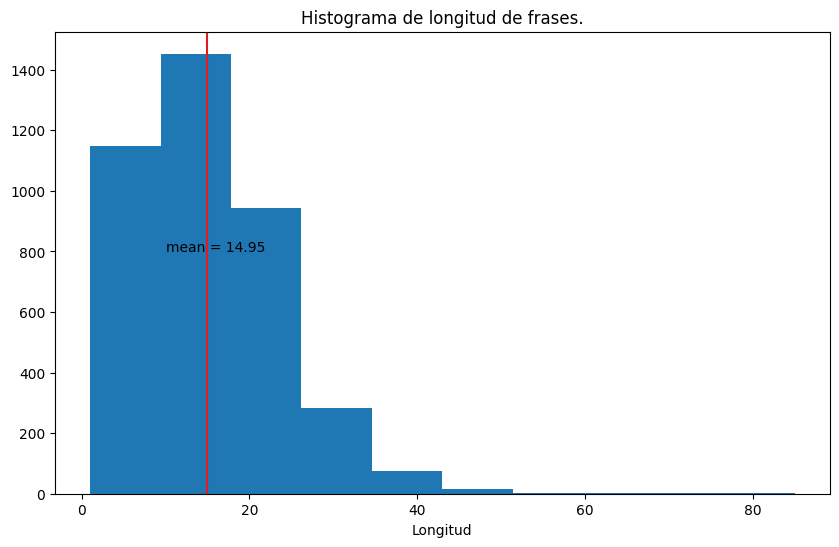

In [6]:
# Plot de Longitud de las oraciones
plt.figure(figsize=(10,6))
plt.hist([len(sentence) for sentence in sentences])
plt.axvline(avg_len, color='#e41a1c')
plt.title('Histograma de longitud de frases.')
plt.xlabel('Longitud')
plt.text(10, 800, 'mean = %.2f' % avg_len)
plt.show()

## Buscando Similaridad
Con la base de datos que tenemos, generamos vectores de representación para cada palabra. De esta manera, podemos encontrar la similaridad entre palabras o frases.

In [7]:
# Treinamos Word2Vec com todos las frases
model = Word2Vec(sentences, workers=3, sg=1, min_count=3, window=10)
word_vectors = model.wv
# Estoy buscando similaridad
# Los 10 mejores
num_best = 10
# Genero con el modelo utilizando las 10mil primeras oraciones
# Con Insantance genero un buscador de similaridad
instance = WmdSimilarity(sentences[:10000], model, num_best=num_best)

In [8]:
# Busco alcalde
# proveedores
text = 'alcalde'
sentence = nltk.word_tokenize(text.lower(), language='spanish')
print(sentence)
query = preprocessing(sentence)
print(query)
sims = instance[query]  # A query observa na classe de similaridade.

['alcalde']
['alcalde']


In [9]:
# Mostramos los resultados de la pregunta
print('Query:')
print(text)
for i in range(num_best):
    print("")
    print('sim = %.4f' % sims[i][1])
    print(" ".join(sentences[sims[i][0]]))

Query:
alcalde

sim = 0.8569
prioridades alcalde culpe oposición

sim = 0.8308
horas mérida rueda prensa presidente grupo socialista guillermo fernández vara asamblea

sim = 0.8186
hemeroteca sede santa maría rábida

sim = 0.8103
psoe condena euforia pp

sim = 0.8085
horas toledo vicepresidente grupo parlamentario socialista santiago moreno ofrece rueda prensa cortes

sim = 0.8069
horas guadalajara portavoz grupo municipal socialista magndalena valerio ofrece rueda prensa ayuntamiento

sim = 0.8048
juan ignacio luca tena

sim = 0.8034
style center fernández relevará

sim = 0.8032
horas cáceres comienza pleno diputación cáceres

sim = 0.8029
sede provincial psoe


In [10]:
model.wv.most_similar('proveedores')

[('facturas', 0.9964778423309326),
 ('pendientes', 0.9962916374206543),
 ('pago', 0.9947641491889954),
 ('deudas', 0.980039119720459),
 ('total', 0.9785211086273193),
 ('pagos', 0.9784457087516785),
 ('importe', 0.9756489396095276),
 ('entidades', 0.9752794504165649),
 ('locales', 0.9667881727218628),
 ('pagar', 0.9667481184005737)]

## Reentrenando modelos de NLP (FINE-TUNING)

Grandes empresas y centros de investigación ya generaron modelos pre entrenados con grandes cargas de bases de datos para clasificación, modelos de preguntas y respuestas, etc.

En este caso usaremos BERT (Google AI Language) un modelo pre entrenado que entiendo el contexto del lenguaje. A este modelo, se le necesita hacer un fine-tuning, es decir, reentrenarlo para una tarea en específico que deseamos realizar. En este caso, deseamos clasificar noticias si son o no relevantes. Para esto necesitamos una base de datos ya etiquetada,noticias que previamente ya hemos identificado si son o no relevantes. Y ajustaremos el modelo Bert para la tarea que desamos realizar.



In [12]:
#install the required libraries
!pip install transformers
!pip install datasets
!pip install pandas
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 KB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 41.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 KB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 21.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-p

In [2]:
#import what we need later
import datasets
from datasets import load_dataset
from datasets import Dataset, DatasetDict

import pandas as pd

from sklearn.model_selection import train_test_split


ModuleNotFoundError: ignored

In [11]:
# Importamos la data
our_data = pd.read_csv("https://www.dropbox.com/s/tbjr8g1hslb8q4o/Full-Economic-News-DFE-839861.csv?dl=1" , encoding = "ISO-8859-1" ) \
            .sample( n = 2000 ) \
            .reset_index( drop = True )

In [6]:
our_data.shape

(1054, 1)

In [25]:
# Tomamos solamente dos columnas el texto y Y, relevance
# Cambiamos yes y No por 1 y 0
mylen = len(our_data["text"].tolist())
mytexts = [] #will contain the text strings
mylabels = [] #will contain the label as 1 or 0 (Yes or No respectively)
for i in range(0,mylen):
    if str(our_data['relevance'][i]) == 'yes':
        mytexts.append(str(our_data["text"][i]))
        mylabels.append(1)
    elif str(our_data["relevance"][i]) == "no":
        mytexts.append(str(our_data["text"][i]))
        mylabels.append(0)
    else:
        print("skipping")
len(mytexts)
len(mylabels)

skipping


1999

In [27]:
# Separamos train y test data 
# Solo 25% de data para test
train_texts, test_texts, train_labels, test_labels = train_test_split(mytexts, mylabels, test_size=.25)
train_texts, val_texts, train_labels, val_labels = train_test_split(train_texts, train_labels, test_size=0.1)


In [28]:
# Obtenemos el modelo bert
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')

# Estemodelo tiene un tokenizador que usaremos para incorporar nuestra
# data
train_encodings = tokenizer(train_texts, truncation=True, padding=True)
val_encodings = tokenizer(val_texts, truncation=True, padding=True)
test_encodings = tokenizer(test_texts, truncation=True, padding=True)

In [30]:
# Introducimos nuestra data al modelo
import torch

class MyDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):

        # Seleccionamos los encodings. Texto/data
        # Labels, Y, lo que queremos predesir
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):

        # Cada texto lo convertimos en un vector tipo tensor
        # De igual manera los labels
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

In [31]:
# Generamos la dataset para el input
train_dataset = MyDataset(train_encodings, train_labels)
test_dataset = MyDataset(test_encodings, test_labels)
val_dataset = MyDataset(val_encodings, val_labels)

In [32]:
# Tomamos Bert para la clasificación
from transformers import BertForSequenceClassification, Trainer, TrainingArguments
from datasets import load_metric

In [33]:
# Especificamos los argumentos para el re entrenamiento
training_args = TrainingArguments(
    output_dir='./results',          # output directory
    num_train_epochs=3,              # total number of training epochs # number of times to change the model
    per_device_train_batch_size=16,  # batch size per device during training # number of observations
    per_device_eval_batch_size=64,   # batch size for evaluation # of obs for evaluation
    warmup_steps=500,                # number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # strength of weight decay
    logging_dir='./logs',            # directory for storing logs
    logging_steps=10,
)

# Definimos la metrica para el re entrenamiento
def compute_metrics(eval_preds):
    metric = load_metric("accuracy", "f1")
    logits, labels = eval_preds
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

# Tomamos el modelo
model = BertForSequenceClassification.from_pretrained("bert-base-cased")

# Instance del Re entrenamiento del Modelo
trainer = Trainer(
    model=model,                         # the instantiated 🤗 Transformers model to be trained
    args=training_args,                  # training arguments, defined above
    train_dataset=train_dataset,         # training dataset
    eval_dataset=val_dataset,           # evaluation dataset
    compute_metrics=compute_metrics      #specify metrics

)


Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

In [34]:
# Entrenando el modelo
trainer.train()

/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss
10,0.508100
20,0.505600
30,0.553900
40,0.430700
50,0.497200
60,0.464900
70,0.456900
80,0.481600
90,0.497000
100,0.432500


TrainOutput(global_step=255, training_loss=0.47049392812392293, metrics={'train_runtime': 95.2231, 'train_samples_per_second': 42.5, 'train_steps_per_second': 2.678, 'total_flos': 1064810441041920.0, 'train_loss': 0.47049392812392293, 'epoch': 3.0})

In [35]:
import numpy as np
# Testeando la predicción del modelo
predictions = trainer.predict(test_dataset)
print(predictions.predictions.shape, predictions.label_ids.shape)
preds = np.argmax(predictions.predictions, axis=-1)
metric =load_metric('accuracy', 'f1')
print(metric.compute(predictions=preds, references=predictions.label_ids))

<ipython-input-33-f345038ad355>:15: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("accuracy", "f1")


(500, 2) (500,)
{'accuracy': 0.828}


In [36]:
# Evaluamos el resultado
from sklearn.metrics import confusion_matrix
print(confusion_matrix(predictions.label_ids, preds, labels=[1,0]))

[[  0  86]
 [  0 414]]


## References
1. https://econnlpcourse.github.io/
2. https://huggingface.co/docs/transformers/training
3. https://www.dropbox.com/s/6vs85d2lqx03r0e/Abad_Gago_et_al.pdf?dl=0 (GOLAZO)
4. Curso de NLP QLAB